# Hands-on Exercise: Training a GAN on CelebA

### Train a simple DCGAN (Deep Convolutional GAN)



1.  Step 1 – Setup and Imports
2.  Step 2 – Prepare the CelebA Dataset
3.  Step 3 – Define Generator and Discriminato
4.  Step 4 – Initialize Models and Optimizers
5.  Step 5 – Training Loop
6.  Step 6 – Inspect Results




In [ ]:
# Make sure to use GPU in Colab: Runtime → Change runtime type → GPU
!nvidia-smi
!pip install torch torchvision tqdm matplotlib --quiet

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from tqdm import tqdm

from torch.utils.data import DataLoader


Wed Nov  5 13:24:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Create Dataset
import numpy as np
from PIL import Image, ImageDraw
import os

os.makedirs("synthetic_dataset3/circles", exist_ok=True)

def make_circle(size=64):
    img = Image.new("L", (size, size), color=0)
    draw = ImageDraw.Draw(img)
    r = np.random.randint(size//8, size//3)
    x, y = np.random.randint(r, size-r, 2)
    draw.ellipse((x-r, y-r, x+r, y+r), fill=255)
    return img

def make_square(size=64):
    img = Image.new("L", (size, size), color=0)
    draw = ImageDraw.Draw(img)
    s = np.random.randint(size//8, size//3)
    x, y = np.random.randint(s, size-s, 2)
    draw.rectangle((x-s, y-s, x+s, y+s), fill=255)
    return img

for i in range(10000):
    make_circle().save(f"synthetic_dataset3/circles/circle_{i}.png")

print("Dataset created with 10000 circles!")


Dataset created with 10000 circles!


In [ ]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.ImageFolder(root='synthetic_dataset3', transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)


nn.ConvTranspose2d(input, features_g* xxxxx, 4, 1, 0, bias=False)

nn.BatchNorm2d(features_g* xxxxxxx)

nn.activation function

In [ ]:
class Generator(nn.Module):
    def __init__(self, z_dim=100, img_channels=3, features_g=64):
        super().__init__()
        self.net = nn.Sequential(
            #???????????????
            #???????????????
            #???????????????

            #???????????????
            #???????????????
            #???????????????

            #???????????????
            #???????????????
            #???????????????

            #???????????????
            #???????????????
            #???????????????

            #???????????????
            nn.Tanh()
        )

    def forward(self, x):
        return self.net(x)




nn.Conv2d(features_d, features_d*2, 4, 2, 1, bias=False),
nn.BatchNorm2d(features_d*2),
nn.LeakyReLU(0.2, inplace=True),



In [ ]:
class Discriminator(nn.Module):
    def __init__(self, img_channels=3, features_d=64):
        super().__init__()
        self.net = nn.Sequential(

            #???????????????
            #???????????????

            #???????????????
            #???????????????
            #???????????????

            #???????????????
            #???????????????
            #???????????????

            #???????????????
            #???????????????
            #???????????????

            #???????????????
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x).view(-1, 1).squeeze(1)


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
z_dim = #???????????????

G = Generator(#??????????????? ).to(device)
D = Discriminator().to(device)

# Initialize weights (important for GANs)
def weights_init(m):
    if isinstance(m, (nn.Conv2d, nn.ConvTranspose2d, nn.BatchNorm2d)):
        nn.init.normal_(m.weight.data, 0.0, 0.02)
G.apply(weights_init)
D.apply(weights_init)

criterion = #???????????????
lr = #???????????????

optimizerD = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))
optimizerG = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))


Epoch 10/20: 100%|██████████| 157/157 [00:10<00:00, 14.58it/s]


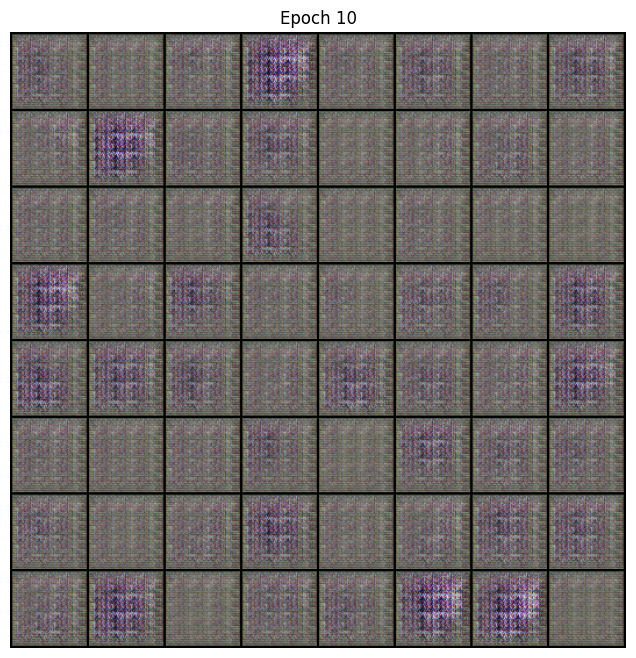

Epoch 20/20: 100%|██████████| 157/157 [00:11<00:00, 14.26it/s]


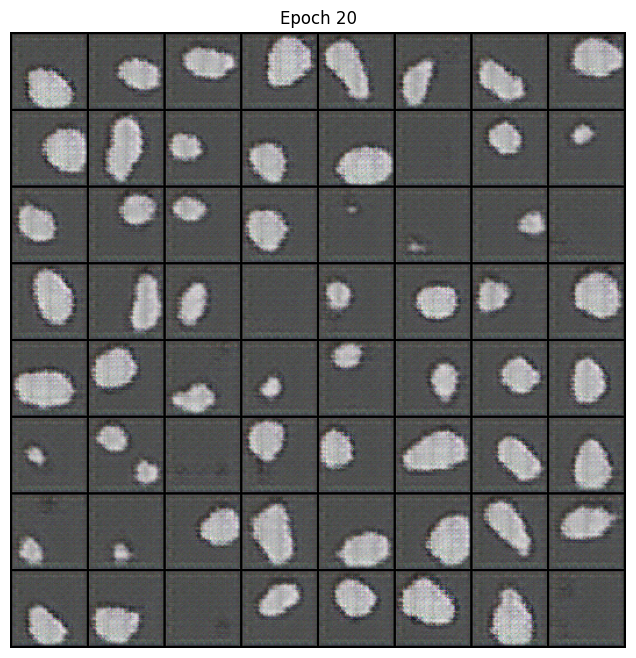

In [ ]:
epochs = #???????????????
fixed_noise = torch.randn(64, z_dim, 1, 1, device=device)

for epoch in range(epochs):
    for real, _ in tqdm(dataloader, desc=f"Epoch {epoch+1}/{epochs}"):
        real = real.to(device)
        batch_size = real.size(0)
        noise = torch.randn(batch_size, z_dim, 1, 1, device=device)
        fake = G(noise)

        # Train Discriminator: maximize log(D(x)) + log(1 - D(G(z)))
        D.zero_grad()
        lossD_real = #???????????????
        lossD_fake = #???????????????
        lossD = lossD_real + lossD_fake
        lossD.backward()
        optimizerD.step()

        # Train Generator: maximize log(D(G(z)))
        G.zero_grad()
        lossG = #???????????????
        lossG.backward()
        optimizerG.step()

    # Generate samples to visualize progress
    if (epoch + 1) % 10 == 0:
      with torch.no_grad():
          fake_images = G(fixed_noise).detach().cpu()
      grid = make_grid(fake_images, nrow=8, normalize=True)
      plt.figure(figsize=(8,8))
      plt.imshow(grid.permute(1,2,0))
      plt.title(f"Epoch {epoch+1}")
      plt.axis("off")
      plt.show()


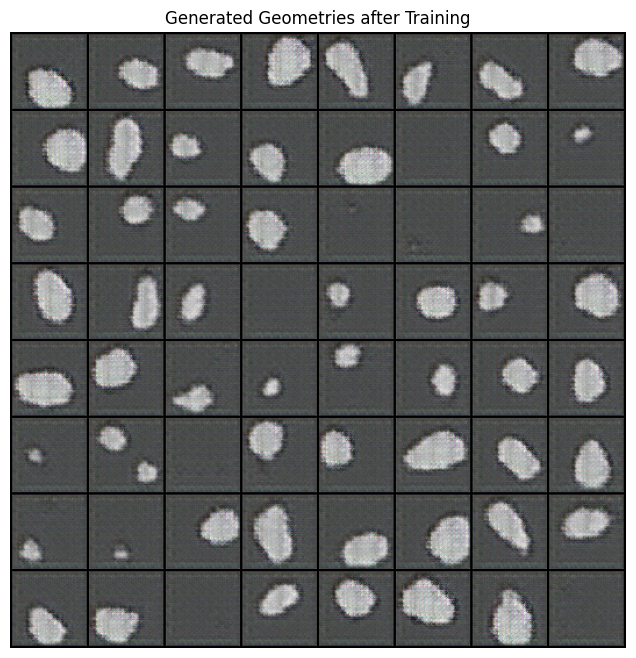

In [ ]:
# Ensure we're in eval mode and no gradients are tracked
G.eval()

# Generate a batch of fake images from fixed noise
with torch.no_grad():
    fake_images = G(fixed_noise).detach().cpu()

# Create a grid of generated faces
grid = make_grid(fake_images, nrow=8, normalize=True)

# Plot the grid
plt.figure(figsize=(8, 8))
plt.imshow(grid.permute(1, 2, 0))
plt.axis("off")
plt.title("Generated Geometries after Training")
plt.show()

# Optionally, save the generated sample grid
plt.imsave("generated_geometries_epoch_final.png", grid.permute(1, 2, 0).numpy())
